In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np
import requests
import datetime

# countries_list = ["DK"]
countries_list = ["BE", "BG", "CH", "CZ", "DE", "DK", "EE", "ES", "FI", "FR", "IT", "IS", "LT", "LV", "LU", "NL", "NO", "PL", "PT", "SE", "UK"]# + ["AU", "HG", "SL"]
download_data = False
# folder_eu = "https://ec.europa.eu/eurostat/databrowser-backend/api/extraction/1.0/LIVE/true/"
# file_eu = "csv/DEMO_R_MWK_TS$DEFAULTVIEW"
# file_eu = "csv/DEMO_MMONTH__custom_26121"
# file_eu = "csv/DEMO_R_MWK_TS__custom_26098"

# folder_uk = "https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/weeklyprovisionalfiguresondeathsregisteredinenglandandwales/"

# weeknr = datetime.date(2010, 6, 16).isocalendar()[1]
# filelist_uk = []
# for year in range(2010, 2021):
#     if year >= 2020:
#         filelist_uk.append("{0}/publishedweek{1}{0}.xlsx".format(year, 38))
#     if 2019 >= year > 2016:
#         filelist_uk.append("{0}/publishedweek52{0}.xls".format(year))
#     if 2016 >= year:
#         filelist_uk.append("{0}/publishedweek{0}.xls".format(year))

# filelist_uk = ["2020/publishedweek382020.xlsx", "2019/publishedweek522020.xls", 
#                 "2018/publishedweek522020.xls", "2017/publishedweek522020.xls", 
#                 "2016/publishedweek522020.xls", "2015/publishedweek2020.xls", 
#                 "2014/publishedweek2014.xls", "2013/publishedweek2020.xls", 
#                 "2012/publishedweek2012.xls", "2011/publishedweek2020.xls"]


# file_uk = "2020/publishedweek382020.xlsx"

# filelist_uk

# if download_data:
#     requests.get(url).content


In [17]:
folder_eu_weekly = "https://ec.europa.eu/eurostat/databrowser-backend/api/extraction/1.0/LIVE/true/"
# file_eu_weekly = "csv/DEMO_R_MWK_TS$DEFAULTVIEW"
# file_eu_weekly = "csv/DEMO_MMONTH__custom_26121"
# file_eu_weekly = "csv/DEMO_R_MWK_10__custom_32605"
file_eu_weekly = "csv/DEMO_R_MWK_TS__custom_26098"
eu_weekly_df = pd.read_csv(folder_eu_weekly + file_eu_weekly, sep='[",",";"]', engine="python")
eu_weekly_df.rename(columns = {'geo\TIME_PERIOD':'geo'}, inplace=True)
eu_weekly_df.replace(r':', np.NaN, regex=True, inplace=True)
eu_weekly_df.fillna(0, inplace = True)
eu_weekly_df.replace([r'p$'], [r''], regex=True, inplace=True)
eu_weekly_df.replace([r'e$'], [r''], regex=True, inplace=True)
# eu_weekly_df.replace([r'e$'], [], regex=True, inplace=True)
eu_weekly_df = eu_weekly_df[(eu_weekly_df["sex"]=="T") & (eu_weekly_df["geo"].isin(countries_list))]
# eu_weekly_df[eu_weekly_df["geo"].isin(countries_list)].groupby("geo").sum()


eu_weekly_df.drop(columns=["freq", "unit", "sex"], inplace=True)
eu_weekly_df = eu_weekly_df.T
eu_weekly_df.columns = eu_weekly_df.loc["geo"]
#eu_weekly_df[eu_weekly_df["geo"].isin(countries_list)] #.groupby("geo").sum()
eu_weekly_df.drop(["geo"], inplace=True)
# eu_weekly_df.columns#["DK"]
# print([i for i in countries_list if i not in eu_weekly_df.columns])
# pd.to_numeric(eu_weekly_df.columns)
# eu_weekly_df.plot(figsize=(15,8))
eu_weekly_df

geo,BE,BG,CH,CZ,DE,DK,EE,ES,FI,FR,...,IT,LT,LU,LV,NL,NO,PL,PT,SE,UK
2000-W01,2814,0,1611,0,0,0,410,9414,1202,0,...,0,759,93,1085,3567,1296,7913,2587,2364,0
2000-W02,2761,0,1698,0,0,0,418,9875,1162,0,...,0,801,95,777,3443,1219,8292,2610,2232,0
2000-W03,2640,0,1578,0,0,0,450,9626,1201,0,...,0,820,93,821,3310,1073,8970,2920,2093,0
2000-W04,2633,0,1520,0,0,0,480,9426,1112,0,...,0,897,85,827,3202,1044,9380,3112,2087,0
2000-W05,2403,0,1429,0,0,0,439,8759,1098,0,...,0,866,67,718,2974,978,9474,3114,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-W35,1860,1918,1120,0,16340,949,299,7994,972,10465,...,0,708,61,504,0,639,0,2046,1480,10348
2020-W36,1867,1930,1064,0,16308,984,278,7665,948,10057,...,0,664,0,459,0,573,0,2001,1496,9006
2020-W37,1790,1887,1074,0,0,972,255,7593,1023,0,...,0,715,0,490,0,0,0,2144,1499,0
2020-W38,1949,1806,1035,0,0,1076,308,0,633,0,...,0,710,0,496,0,0,0,0,1386,0


In [3]:
folder_eu_daily = "https://opendata.ecdc.europa.eu/covid19/casedistribution/"
file_eu_daily = "csv"
date_parser_daily = lambda x: pd.datetime.strptime(str(x), "%d/%m/%Y")
eu_daily_df = pd.read_csv(folder_eu_daily + file_eu_daily, index_col="dateRep", parse_dates=["dateRep"], date_parser=date_parser_daily)
def moving_avg(data, avg_margin=5):
    return [0]*avg_margin + [sum(data[i-avg_margin:i+avg_margin+1])/(1+2*avg_margin) for i in range(avg_margin, len(data)-avg_margin)] + [0]*avg_margin
# eu_daily_df["deaths_smooth"] = moving_avg(eu_daily_df["deaths"])
eu_daily_df

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2020-10-05,5,10,2020,44,0,Afghanistan,AF,AFG,38041757.0,Asia,0.780721
2020-10-04,4,10,2020,7,4,Afghanistan,AF,AFG,38041757.0,Asia,0.665059
2020-10-03,3,10,2020,5,0,Afghanistan,AF,AFG,38041757.0,Asia,0.975244
2020-10-02,2,10,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.085649
2020-10-01,1,10,2020,14,0,Afghanistan,AF,AFG,38041757.0,Asia,1.040961
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


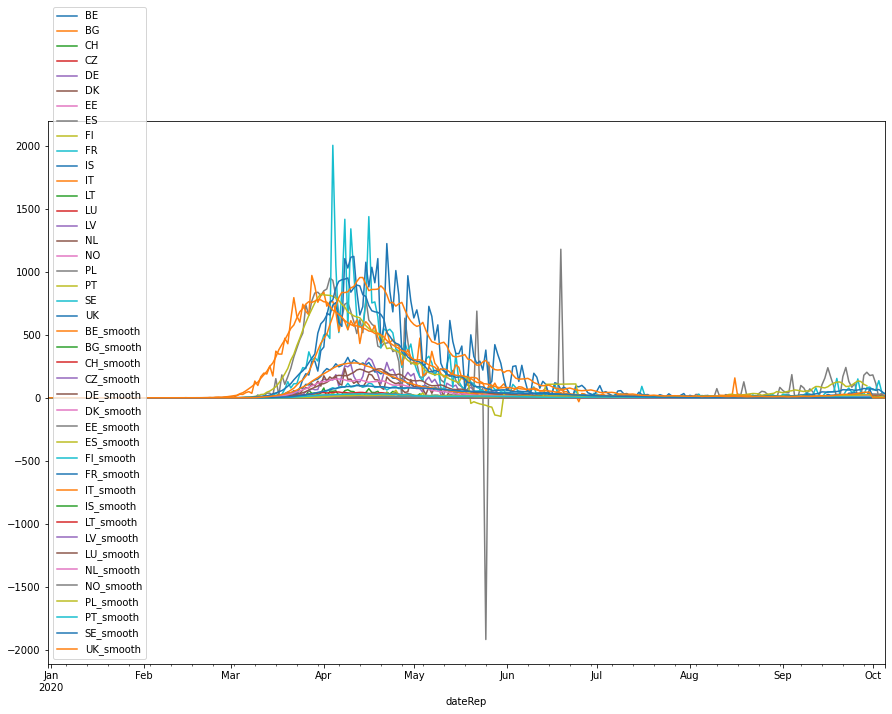

In [4]:
deaths_daily_df = eu_daily_df[eu_daily_df["geoId"].isin(countries_list)].groupby(["dateRep","geoId"]).sum()["deaths"].unstack()
deaths_daily_df
for nation in countries_list:
    deaths_daily_df[nation + "_smooth"] = moving_avg(deaths_daily_df[nation])
deaths_daily_df.plot(figsize=(15,10))
plt.legend(loc="lower left")
plt.savefig("daily_eu_deaths.pdf")
# There is obviously an error in the spanish data here... this error is also present in the JHU data.

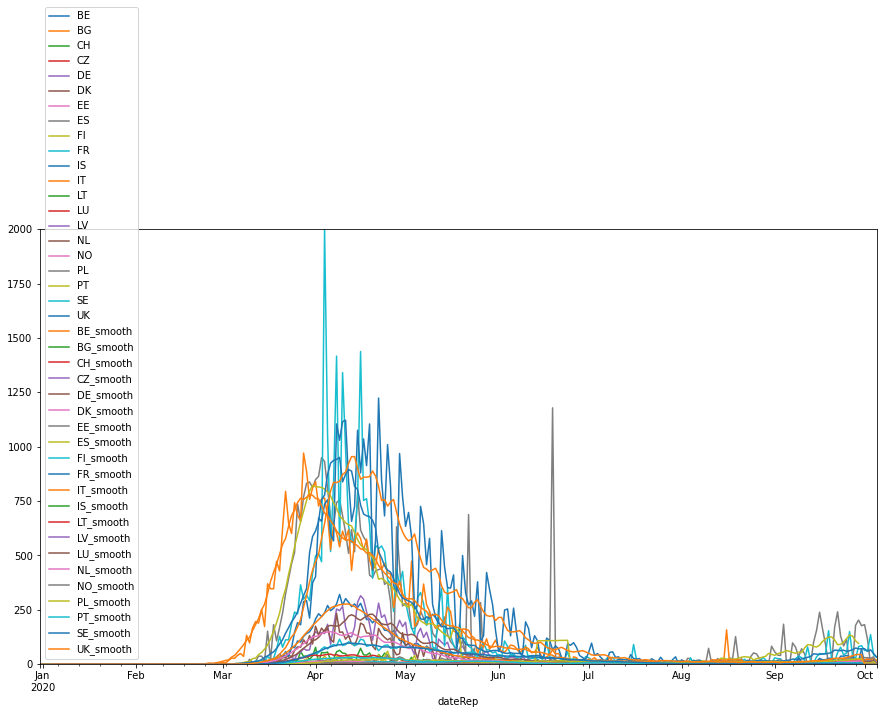

In [5]:
# eu_daily_df[eu_daily_df["geoId"]=="ES"].loc["2020-05":"2020-06"]# and eu_daily_df["deaths"]<0]
# eu_daily_df[eu_daily_df["geoId"].isin(countries_list)].groupby(["dateRep","geoId"]).sum()["deaths"].unstack().plot(figsize=(15,8))
deaths_daily_df.plot(figsize=(15,8))
plt.ylim(0,2000)
plt.legend(loc="lower left")
plt.savefig("daily_eu_deaths_nice_axis.pdf")

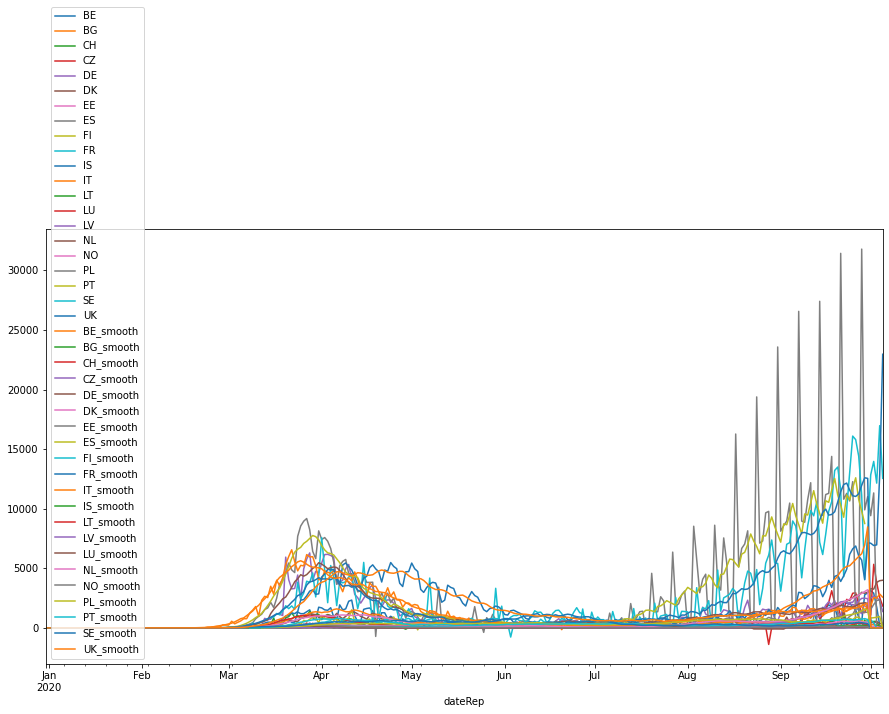

In [6]:
cases_daily_df = eu_daily_df[eu_daily_df["geoId"].isin(countries_list)].groupby(["dateRep","geoId"]).sum()["cases"].unstack()
for nation in countries_list:
    cases_daily_df[nation + "_smooth"] = moving_avg(cases_daily_df[nation])
cases_daily_df.plot(figsize=(15,8))
# plt.ylim(0,2000)
plt.legend(loc="lower left")
plt.savefig("daily_eu_cases_nice_axis.pdf")
# eu_daily_df

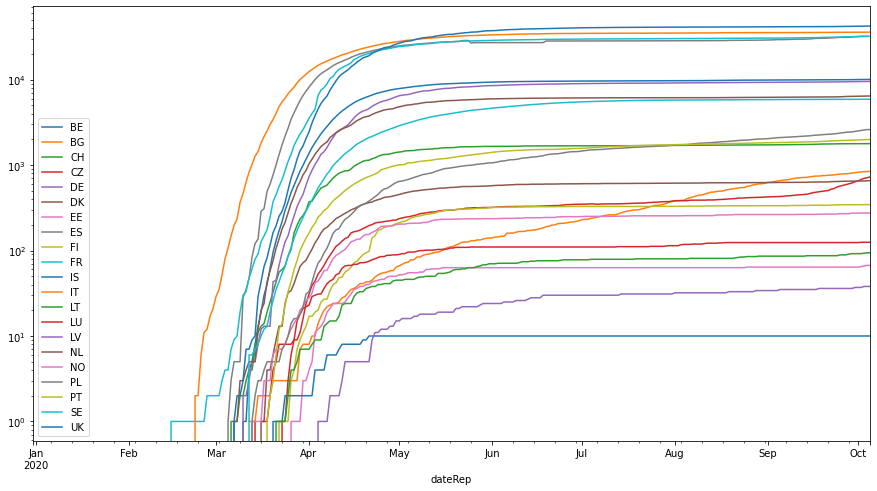

In [7]:
eu_daily_df[eu_daily_df["geoId"].isin(countries_list)].groupby(["dateRep","geoId"]).sum()["deaths"].unstack().cumsum().plot(figsize=(15,8))
plt.yscale("log")
plt.legend(loc="lower left")
plt.savefig("cumulated_eu_deaths_nice_axis.pdf")